In [2]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pyspark.sql.functions import col, sum, year, month, dayofmonth, when
from pyspark.sql.types import IntegerType 
from datetime import date



In [3]:
spark = SparkSession.builder.appName('Data').getOrCreate()

# read the csv file and make sure to add option('header','true') and inferSchema= True
# inferSchema = True,  the defult type for each features are String, by adding "inferSchema" parameter, we can see the type for each feature 

df_pyspark = spark.read.option('header','true').csv("credit_card_transactions.csv",inferSchema= True) 

#check the Schema "type for each feature"
df_pyspark.printSchema()

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- trans_date_trans_time: timestamp (nullable = true)
 |-- cc_num: long (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)
 |-- merch_zipcode: integer (nullable = true)



In [6]:
spark = SparkSession.builder.appName('Data').getOrCreate()

# read the csv file and make sure to add option('header','true') and inferSchema= True
# inferSchema = True,  the defult type for each features are String, by adding "inferSchema" parameter, we can see the type for each feature 
file_path = "credit_card_transactions.csv"
df_pyspark = spark.read.option('header','true').csv(file_path,inferSchema= True) 

#check the Schema "type for each feature"
df_pyspark.printSchema()

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- trans_date_trans_time: timestamp (nullable = true)
 |-- cc_num: long (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)
 |-- merch_zipcode: integer (nullable = true)



root
 |-- Unnamed: 0: integer (nullable = true)
 |-- trans_date_trans_time: timestamp (nullable = true)
 |-- cc_num: long (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)
 |-- merch_zipcode: integer (nullable = true)



In [21]:
#Dataset Structure 
row_count = df_pyspark.count()
col_count = len(df_pyspark.columns)
print(f"Rows: {row_count}, Columns: {col_count}")


Rows: 1296675, Columns: 24


In [23]:
# List all columns
columns = df_pyspark.columns # Select columns with sum of isNull for each
missing_data = df_pyspark.select([sum(col(c).isNull().cast("int")).alias(c) for c in columns]) 

# Convert the result to a list
missing_data_list = missing_data.collect()[0].asDict().items()

# Print the missing data with clarity
for column, missing_count in missing_data_list:
    print(f"{column}': {missing_count} missing values.")


Unnamed: 0': 0 missing values.
trans_date_trans_time': 0 missing values.
cc_num': 0 missing values.
merchant': 0 missing values.
category': 0 missing values.
amt': 0 missing values.
first': 0 missing values.
last': 0 missing values.
gender': 0 missing values.
street': 0 missing values.
city': 0 missing values.
state': 0 missing values.
zip': 0 missing values.
lat': 0 missing values.
long': 0 missing values.
city_pop': 0 missing values.
job': 0 missing values.
dob': 0 missing values.
trans_num': 0 missing values.
unix_time': 0 missing values.
merch_lat': 0 missing values.
merch_long': 0 missing values.
is_fraud': 0 missing values.
merch_zipcode': 195973 missing values.


In [33]:
# Compute summary statistics
summary = df_pyspark.describe().toPandas() # Convert to Pandas DataFrame for better readability 
# Display the summary statistics 
print(summary) 

# Compute median (approxQuantile) for each numeric column 
# numeric_columns = [col for col in df_pyspark.columns if df_pyspark.schema[col].dataType in ['int', 'double', 'float']] 



  summary         Unnamed: 0                 cc_num             merchant  \
0   count            1296675                1296675              1296675   
1    mean           648337.0  4.1719204207968422E17                 None   
2  stddev  374317.9744882685  1.3088064470002409E18                 None   
3     min                  0            60416207185  fraud_Abbott-Rogahn   
4     max            1296674    4992346398065154184     fraud_Zulauf LLC   

        category                amt    first     last   gender  \
0        1296675            1296675  1296675  1296675  1296675   
1           None  70.35103545606984     None     None     None   
2           None  160.3160385715272     None     None     None   
3  entertainment                1.0    Aaron   Abbott        F   
4         travel            28948.9  Zachary   Zuniga        M   

                       street  ...                lat                long  \
0                     1296675  ...            1296675             129

In [27]:
df_pyspark.describe()


DataFrame[summary: string, Unnamed: 0: string, cc_num: string, merchant: string, category: string, amt: string, first: string, last: string, gender: string, street: string, city: string, state: string, zip: string, lat: string, long: string, city_pop: string, job: string, trans_num: string, unix_time: string, merch_lat: string, merch_long: string, is_fraud: string, merch_zipcode: string]

In [29]:

column_data_types = df_pyspark.dtypes
for x in column_data_types:
    print(x[0], "type is : " ,x[1])

Unnamed: 0 type is :  int
trans_date_trans_time type is :  timestamp
cc_num type is :  bigint
merchant type is :  string
category type is :  string
amt type is :  double
first type is :  string
last type is :  string
gender type is :  string
street type is :  string
city type is :  string
state type is :  string
zip type is :  int
lat type is :  double
long type is :  double
city_pop type is :  int
job type is :  string
dob type is :  date
trans_num type is :  string
unix_time type is :  int
merch_lat type is :  double
merch_long type is :  double
is_fraud type is :  int
merch_zipcode type is :  int


In [11]:
#Count missing values per column: 

from pyspark.sql.functions import col, isnan, when, count

#convert dob columns and drop some columns

# Calculate age 
current_year = date.today().year 
df_pyspark = df_pyspark.withColumn("age", current_year - year(col("dob")))



df_pyspark = df_pyspark.drop("trans_num","unix_time","dob")
display(df_pyspark.head(4))


row_count = df_pyspark.count()
col_count = len(df_pyspark.columns)
print(f"Rows: {row_count}, Columns: {col_count}")


[Row(Unnamed: 0=0, trans_date_trans_time=datetime.datetime(2019, 1, 1, 0, 0, 18), cc_num=2703186189652095, merchant='fraud_Rippin, Kub and Mann', category='misc_net', amt=4.97, first='Jennifer', last='Banks', gender='F', street='561 Perry Cove', city='Moravian Falls', state='NC', zip=28654, lat=36.0788, long=-81.1781, city_pop=3495, job='Psychologist, counselling', merch_lat=36.011293, merch_long=-82.048315, is_fraud=0, merch_zipcode=28705, age=36),
 Row(Unnamed: 0=1, trans_date_trans_time=datetime.datetime(2019, 1, 1, 0, 0, 44), cc_num=630423337322, merchant='fraud_Heller, Gutmann and Zieme', category='grocery_pos', amt=107.23, first='Stephanie', last='Gill', gender='F', street='43039 Riley Greens Suite 393', city='Orient', state='WA', zip=99160, lat=48.8878, long=-118.2105, city_pop=149, job='Special educational needs teacher', merch_lat=49.159046999999994, merch_long=-118.186462, is_fraud=0, merch_zipcode=None, age=46),
 Row(Unnamed: 0=2, trans_date_trans_time=datetime.datetime(2019

Rows: 1296675, Columns: 22


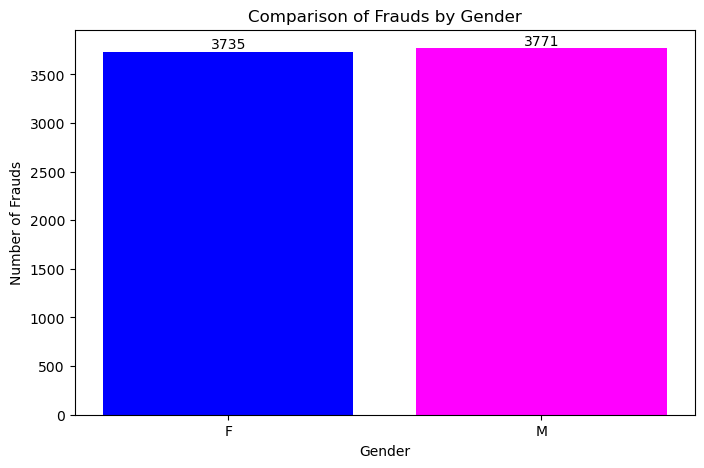

In [13]:
# Aggregate the data 
fraud_counts = df_pyspark.groupBy("gender").agg(count(when(col("is_fraud") == 1, True)).alias("fraud_count")) 
# Convert to Pandas DataFrame for visualization 
fraud_counts_pd = fraud_counts.toPandas() 


# Plotting 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5)) 
plt.bar(fraud_counts_pd["gender"], fraud_counts_pd["fraud_count"], color=["blue", "magenta"])
plt.xlabel("Gender") 
plt.ylabel("Number of Frauds") 
plt.title("Comparison of Frauds by Gender")

bars = plt.bar(fraud_counts_pd["gender"], fraud_counts_pd["fraud_count"], color=["blue", "magenta"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')


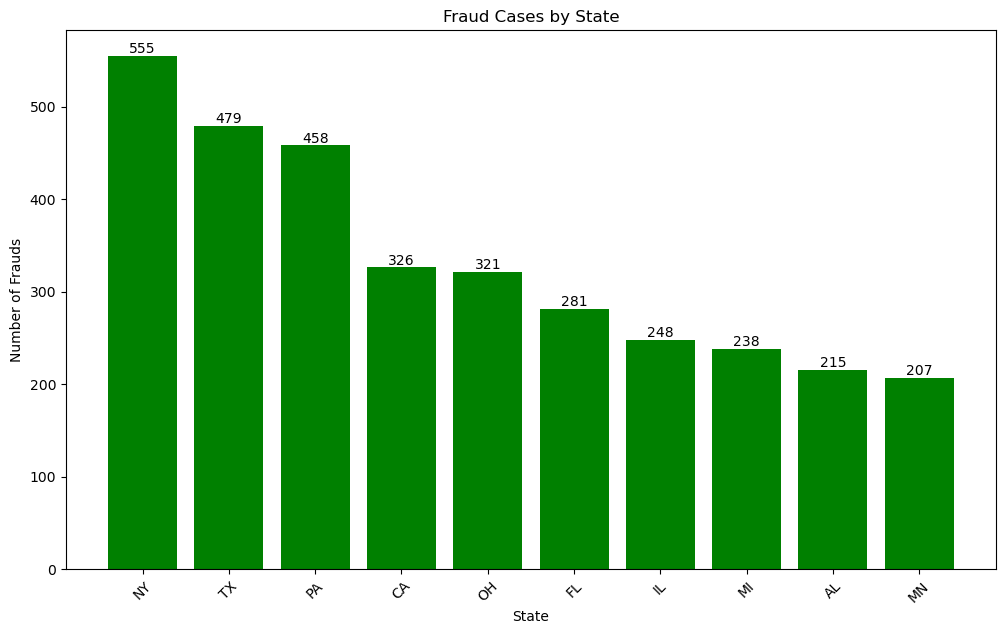

In [192]:


# Aggregate the data by state
fraud_by_state_top_10 = (
    df_pyspark.groupBy("state")
    .agg(count(when(col("is_fraud") == 1, True)).alias("fraud_count"))
    .orderBy(col("fraud_count").desc())
    .limit(10)
)
# Convert to Pandas DataFrame for visualization
fraud_by_state_pd = fraud_by_state_top_10.toPandas()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
bars = plt.bar(fraud_by_state_pd["state"], fraud_by_state_pd["fraud_count"], color="green")


plt.xlabel("State")
plt.ylabel("Number of Frauds")
plt.title("Fraud Cases by State")

# Rotate labels 
plt.xticks(rotation=45)
# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()


C:\Users\khpdr\AppData\Local\Temp\ipykernel_4076\2969990230.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age_range = fraud_by_age_pd.groupby('age_range')['fraud_count'].sum().reset_index()


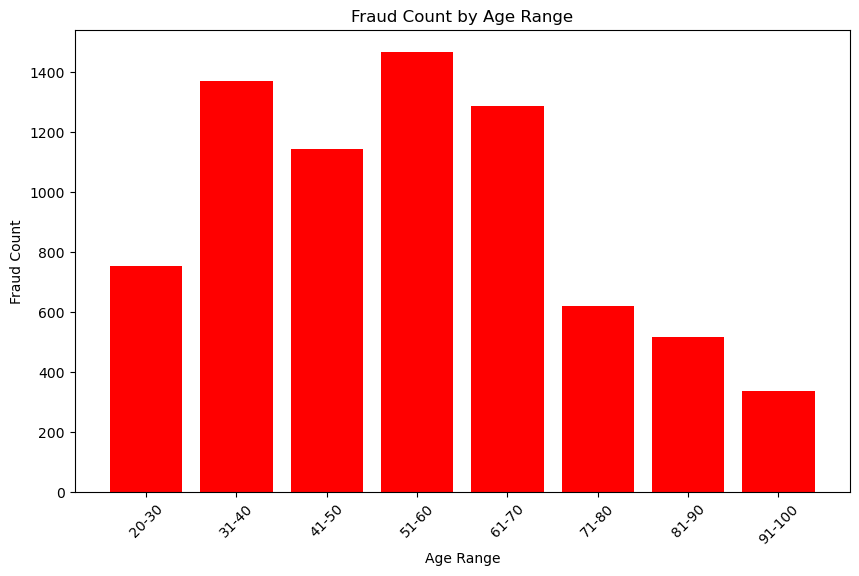

In [225]:
import pandas as pd

# Aggregate the data by age
fraud_by_age = df_pyspark.groupBy("age").agg(count(when(col("is_fraud") == 1, True)).alias("fraud_count"))

# Convert to Pandas DataFrame for visualization
fraud_by_age_pd = fraud_by_age.toPandas()

# Define age ranges (e.g., 20-30, 31-40, etc.)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ["20-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

# Create a new column with age ranges
fraud_by_age_pd['age_range'] = pd.cut(fraud_by_age_pd['age'], bins=age_bins, labels=age_labels, right=False)

# Group by the age range and sum the fraud counts for each range
fraud_by_age_range = fraud_by_age_pd.groupby('age_range')['fraud_count'].sum().reset_index()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(fraud_by_age_range['age_range'], fraud_by_age_range['fraud_count'], color="red")
plt.xlabel("Age Range")
plt.ylabel("Fraud Count")
plt.title("Fraud Count by Age Range")
plt.xticks(rotation=45)
plt.show()


plt.show()


In [254]:
fraud_only_df = df_pyspark.filter(col("is_fraud")== 1)
df_fraud = fraud_only_df.toPandas()



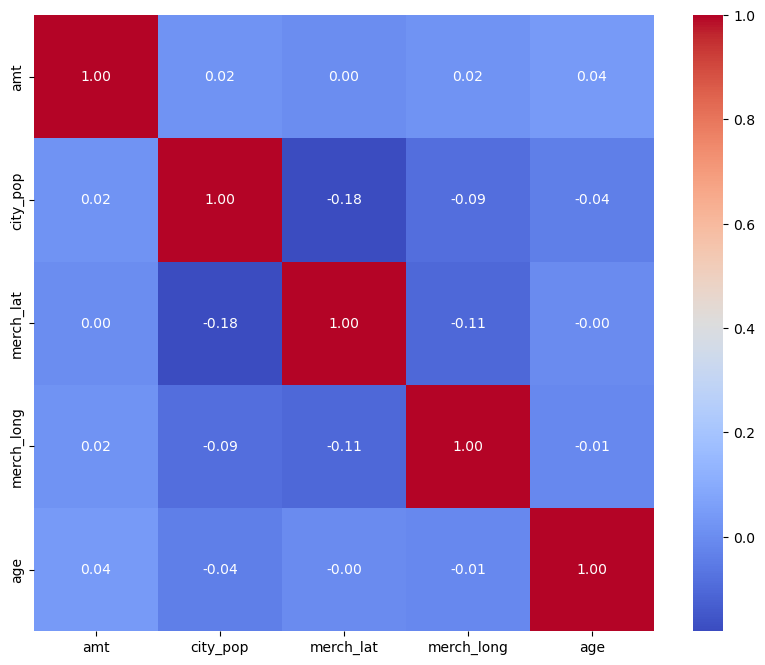

In [270]:
# Select numerical columns only
numerical_fraud = df_fraud[["amt", "city_pop", "merch_lat", "merch_long","age"]]


# Creating the correlation matrix
correlation_matrix = numerical_fraud.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



In [262]:
df_fraud

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,merch_zipcode,age
0,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,28611,35.9946,-81.7266,885,Soil scientist,36.430124,-81.179483,1,28644.0,36
1,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,78208,29.4400,-98.4590,1595797,Horticultural consultant,29.819364,-99.142791,1,78055.0,64
2,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,78208,29.4400,-98.4590,1595797,Horticultural consultant,29.273085,-98.836360,1,78039.0,64
3,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,28611,35.9946,-81.7266,885,Soil scientist,35.909292,-82.091010,1,28777.0,36
4,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,78208,29.4400,-98.4590,1595797,Horticultural consultant,29.786426,-98.683410,1,78006.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,32960,27.6330,-80.4031,105638,"Librarian, public",26.888686,-80.834389,1,NaN,38
7502,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,32960,27.6330,-80.4031,105638,"Librarian, public",28.216707,-79.855648,1,NaN,38
7503,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,70726,30.4590,-90.9027,71335,Herbalist,29.700456,-91.361632,1,70392.0,30
7504,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,79759,31.8599,-102.7413,23,Cytogeneticist,32.675272,-103.484949,1,NaN,55


In [239]:
# # Missing Values and Duplicates 
# duplicate_count = df_pyspark.groupBy(df_pyspark.columns).count().filter("count > 1").count()
# print(f"Number of duplicate rows: {duplicate_count}")

In [ ]:
import dask.dataframe as dd

# Load the CSV file with Dask
data = dd.read_csv(file_path)

# Calculate the percentage of missing values per column
total_count = len(data)
missing_data = data.isnull().sum() / total_count * 100

# Show missing data percentages
print("Percentage of missing values per column:")
print(missing_data.compute())

# Calculate the mode of merch_zipcode, excluding missing values
merch_zipcode_mode = data['merch_zipcode'].mode().compute()[0]

# Fill missing values in merch_zipcode with the mode
data = data.fillna({"merch_zipcode": merch_zipcode_mode})

# Verify that there are no more missing values in merch_zipcode
print("Percentage of missing values after imputation:")
print(data.isnull().sum().compute() / len(data) * 100)

In [ ]:
import dask.dataframe as dd

# Load the CSV file with Dask
file_path = "C:/credit_card_transactions.csv"  

# Calculate the percentage of missing values per column
total_count = len(data)
missing_data = data.isnull().sum() / total_count * 100

# Show missing data percentages
print("Percentage of missing values per column:")
print(missing_data.compute())

# Calculate the mode of merch_zipcode, excluding missing values
merch_zipcode_mode = data['merch_zipcode'].mode().compute()[0]

# Fill missing values in merch_zipcode with the mode
data = data.fillna({"merch_zipcode": merch_zipcode_mode})

# Verify that there are no more missing values in merch_zipcode
print("Percentage of missing values after imputation:")
print(data.isnull().sum().compute() / len(data) * 100)


############################################################################################################################################################


import dask.dataframe as dd

# Load the CSV file with Dask (if not already loaded)
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)

# Convert 'gender' and 'state' to categorical and use categorize() for Dask compatibility
data = data.categorize(columns=['gender', 'state'])

# One-hot encode 'gender' and 'state'
data = dd.get_dummies(data, columns=['gender', 'state'])

# Convert 'merchant', 'category', 'job' to categorical for label encoding
data = data.categorize(columns=['merchant', 'category', 'job'])

# Map categories to codes for 'merchant', 'category', 'job'
data['merchant_encoded'] = data['merchant'].cat.codes
data['category_encoded'] = data['category'].cat.codes
data['job_encoded'] = data['job'].cat.codes

# Drop original columns if needed after encoding
data = data.drop(['merchant', 'category', 'job'], axis=1)

# Print the first few rows to verify
print(data.head())


############################################################################################################################################################

import dask.dataframe as dd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file with Dask
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)

# Define numerical columns based on inspection
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Convert numerical columns to Pandas for scaling
numerical_data_pd = data[numerical_columns].compute()  # Convert to Pandas for in-memory operation

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data with the scaler
scaled_values = scaler.fit_transform(numerical_data_pd)

# Create a Pandas DataFrame with scaled values and original column names
scaled_data_pd = pd.DataFrame(scaled_values, columns=numerical_columns)

# Convert back to Dask DataFrame if you need to continue with Dask operations
scaled_data_dd = dd.from_pandas(scaled_data_pd, npartitions=data.npartitions)

# Print the first few rows to verify the scaled data
print("Scaled data:")
print(scaled_data_dd.head())

############################################################################################################################################################

import dask.dataframe as dd
import pandas as pd

# Load the CSV file with Dask
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)

# Convert to Pandas to calculate correlations
data_pd = data.compute()

# Keep only numeric columns for correlation calculation
numeric_data = data_pd.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with the target variable 'is_fraud'
correlation = numeric_data.corr()['is_fraud'].sort_values(ascending=False)

# Select features with significant correlation (e.g., absolute correlation > 0.1)
significant_features = correlation[abs(correlation) > 0.1].index.tolist()

# Drop the target from the list to keep only features
significant_features.remove('is_fraud')

# Filter data to include only significant features
selected_data = data[significant_features]

# Print the selected features
print("Selected features based on correlation with target:")
print(significant_features)

############################################################################################################################################################



import dask.dataframe as dd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file with Dask
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)

# Convert Dask DataFrame to Pandas for feature selection
data_pd = data.compute()

# Step 1: Feature Selection
# Keep only numeric columns for correlation calculation
numeric_data = data_pd.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with the target variable 'is_fraud'
correlation = numeric_data.corr()['is_fraud'].sort_values(ascending=False)

# Select features with significant correlation (absolute correlation > 0.1)
significant_features = correlation[abs(correlation) > 0.1].index.tolist()
significant_features.remove('is_fraud')  # Exclude the target variable

# Step 2: Prepare Data for Model Training
# Define features (X) and target (y)
X = data_pd[significant_features]  # Use the selected significant features
y = data_pd['is_fraud']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

############################################################################################################################################################



import dask.dataframe as dd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file with Dask and convert to Pandas for processing
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)
data_pd = data.compute()  # Convert to Pandas DataFrame

# Assuming significant_features is defined as per the previous feature selection step
significant_features = ['amt']  # Update with actual significant features list if needed
X = data_pd[significant_features]  # Features selected from the previous step
y = data_pd['is_fraud']  # Target variable

# Data Splitting
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

############################################################################################################################################################

# Load the CSV file with Dask and convert to Pandas for processing
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)
data_pd = data.compute()  # Convert to a Pandas DataFrame

# Assuming significant_features is defined as per the previous feature selection step
significant_features = ['amt']  # Update with actual significant features list if needed
X = data_pd[significant_features]  # Features selected from the previous step
y = data_pd['is_fraud']  # Target variable

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training with basic RandomForest parameters
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation on test set
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

############################################################################################################################################################



import dask.dataframe as dd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Load the CSV file with Dask and convert to Pandas for processing
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)
data_pd = data.compute()  # Convert to a Pandas DataFrame

# Assuming significant_features is defined as per the previous feature selection step
significant_features = ['amt']  # Update with actual significant features list if needed
X = data_pd[significant_features]  # Features selected from previous step
y = data_pd['is_fraud']  # Target variable

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best model from hyperparameter tuning
best_model = random_search.best_estimator_

# Model Evaluation on test set
y_pred = best_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


############################################################################################################################################################

import dask.dataframe as dd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the CSV file with Dask and convert to Pandas for processing
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)
data_pd = data.compute()  # Convert to a Pandas DataFrame

# Assuming significant_features is defined as per the previous feature selection step
significant_features = ['amt']  # Update with actual significant features list if needed
X = data_pd[significant_features]  # Features selected from previous step
y = data_pd['is_fraud']  # Target variable

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cross_val_scores = cross_val_score(model, X, y, cv=k, scoring="accuracy")

# Print cross-validation scores and average accuracy
print(f"Cross-validation scores for {k} folds: {cross_val_scores}")
print(f"Average cross-validation accuracy: {np.mean(cross_val_scores)}")

# Training the model on the full training data for final evaluation
model.fit(X, y)
y_pred = model.predict(X)

# Final evaluation metrics
accuracy = accuracy_score(y, y_pred)
print(f"Final Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y, y_pred))


############################################################################################################################################################



import dask.dataframe as dd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file with Dask and convert to Pandas for processing
file_path = "C:/credit_card_transactions.csv"
data = dd.read_csv(file_path)
data_pd = data.compute()  # Convert to a Pandas DataFrame

# Assuming significant_features is defined as per the previous feature selection step
significant_features = ['amt']  # Update with actual significant features list if needed
X = data_pd[significant_features]  # Features selected from previous step
y = data_pd['is_fraud']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
}

# Evaluate each model
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} - Cross-validation accuracy: {cv_scores.mean():.4f}")

    # Fit the model and evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Classification Report:\n{classification_report(y_test, y_pred)}\n")

############################################################################################################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset (replace with actual dataset path or content)
# Example: Fraud dataset for financial transactions
df = pd.read_csv('your_dataset.csv')  # Replace with actual file path

# Define target and features
target_col = 'is_fraud'  # Replace with your dataset's target column name
X = df.drop(columns=[target_col])
y = df[target_col]

Data Distribution Visualization 

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Numerical Features: Histograms and Boxplots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Distribution of {col}", fontsize=14)

    plt.subplot(1, 2, 1)
    sns.histplot(X[col], bins=30, kde=True)
    plt.title("Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=X[col])
    plt.title("Boxplot")

    plt.tight_layout()
    plt.show()

# Categorical Features: Bar Plots
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=X, x=col, order=X[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

Feature Importance Visualization 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Performance Metrics
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Feature Importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Model Performance Across Features 

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy')
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Permutation Importance': perm_importance.importances_mean
}).sort_values(by='Permutation Importance', ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=perm_df, x='Permutation Importance', y='Feature')
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
#Data Distribution Visualization 

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Numerical Features: Histograms and Boxplots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Distribution of {col}", fontsize=14)

    plt.subplot(1, 2, 1)
    sns.histplot(X[col], bins=30, kde=True)
    plt.title("Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=X[col])
    plt.title("Boxplot")

    plt.tight_layout()
    plt.show()

# Categorical Features: Bar Plots
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=X, x=col, order=X[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

#Feature Importance Visualization 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Performance Metrics
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Feature Importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Model Performance Across Features 

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy')
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Permutation Importance': perm_importance.importances_mean
}).sort_values(by='Permutation Importance', ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=perm_df, x='Permutation Importance', y='Feature')
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
